# TP Concurrente - Analisis de resultados de los experimentos y generación de gráficos

In [70]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

colorpalette = ["#BEB8EB", "#8FCB9B", "#80FFEC"]
sns.set_theme(style="whitegrid")
sns.set_palette(colorpalette)

#plt.rcParams.update({'figure.autolayout': True})

## Cargamos los tiempos de ejecución de cada uno de los escenarios 

In [71]:
colnames = ["Fine Grained List", "Optimistic List", "Lock-Free List"]
experimento1Threads2 = pd.read_csv("src/logs/timeEscenario1Threads2.txt", sep = " ", names = colnames)
experimento1Threads4 = pd.read_csv("src/logs/timeEscenario1Threads4.txt", sep = " ", names = colnames)
experimento1Threads8 = pd.read_csv("src/logs/timeEscenario1Threads8.txt", sep = " ", names = colnames)

experimento1Threads2 = experimento1Threads2.apply(lambda x: x/500)
experimento1Threads4 = experimento1Threads4.apply(lambda x: x/1000)
experimento1Threads8 = experimento1Threads8.apply(lambda x: x/2000)

experimento2Threads2 = pd.read_csv("src/logs/timeEscenario2Threads2.txt", sep = " ", names = colnames)
experimento2Threads4 = pd.read_csv("src/logs/timeEscenario2Threads4.txt", sep = " ", names = colnames)
experimento2Threads8 = pd.read_csv("src/logs/timeEscenario2Threads8.txt", sep = " ", names = colnames)

experimento2Threads2 = experimento2Threads2.apply(lambda x: x/500)
experimento2Threads4 = experimento2Threads4.apply(lambda x: x/1000)
experimento2Threads8 = experimento2Threads8.apply(lambda x: x/2000)

experimento3Threads2 = pd.read_csv("src/logs/timeEscenario3Threads2.txt", sep = " ", names = colnames)
experimento3Threads4 = pd.read_csv("src/logs/timeEscenario3Threads4.txt", sep = " ", names = colnames)
experimento3Threads8 = pd.read_csv("src/logs/timeEscenario3Threads8.txt", sep = " ", names = colnames)

experimento4ThreadsBlock        = pd.read_csv("src/logs/timeEscenario4AddBlock.txt", sep = " ", names = colnames)
experimento4ThreadsAlternated   = pd.read_csv("src/logs/timeEscenario1Threads4.txt", sep = " ", names = colnames)

experimento5ThreadsAdd1ThreadsRemove1 = pd.read_csv("src/logs/sizeEscenario5ThreadsAdd1ThreadsRemove1.txt", sep = " ", names = colnames)
experimento5ThreadsAdd1ThreadsRemove4 = pd.read_csv("src/logs/sizeEscenario5ThreadsAdd1ThreadsRemove4.txt", sep = " ", names = colnames)
experimento5ThreadsAdd4ThreadsRemove1 = pd.read_csv("src/logs/sizeEscenario5ThreadsAdd4ThreadsRemove1.txt", sep = " ", names = colnames)

experimento5ThreadsAdd1ThreadsRemove1 = experimento5ThreadsAdd1ThreadsRemove1.apply(lambda x: 1000-x)
experimento5ThreadsAdd1ThreadsRemove4 = experimento5ThreadsAdd1ThreadsRemove4.apply(lambda x: 1000-x)
experimento5ThreadsAdd4ThreadsRemove1 = experimento5ThreadsAdd4ThreadsRemove1.apply(lambda x: 1000-x)

experimento6SleepBefore500 = pd.read_csv("src/logs/sizeEscenario6SleepBeforeAddingElement500.txt", sep = " ", names = colnames)
experimento6SleepBefore0   = pd.read_csv("src/logs/sizeEscenario6SleepBeforeAddingElement0.txt", sep = " ", names = colnames)
experimento6SleepBefore250   = pd.read_csv("src/logs/sizeEscenario6SleepBeforeAddingElement250.txt", sep = " ", names = colnames)

experimento6SleepBefore500 = experimento6SleepBefore500.apply(lambda x: 1000-x)
experimento6SleepBefore0   = experimento6SleepBefore0.apply(lambda x: 1000-x)
experimento6SleepBefore250   = experimento6SleepBefore250.apply(lambda x: 1000-x)

### Generamos gráficos con esos datos


#### Experimento 1: Agregar concurrentemente  

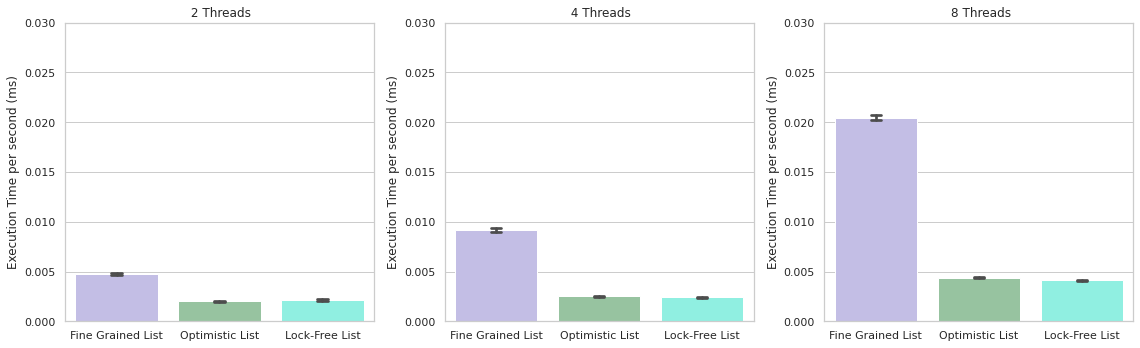

In [72]:
fig, ax = plt.subplots(1, 3, figsize= (16, 5))
plt.tight_layout()

sns.barplot(experimento1Threads2, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[0], capsize= 0.1, errcolor=".3")
sns.barplot(experimento1Threads4, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[1], capsize= 0.1, errcolor=".3")
sns.barplot(experimento1Threads8, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[2], capsize= 0.1, errcolor=".3")

for i in range(0, 3): 
    ax[i].set_ylabel("Execution Time per second (ms)")
    ax[i].set_ylim(0, 0.030)

ax[0].set_title(" " + str(2) + " Threads")
ax[1].set_title(" " + str(4) + " Threads")
ax[2].set_title(" " + str(8) + " Threads")

plt.savefig('graficos/Experimento1.pdf', bbox_inches="tight")

#### Experimento 2: Agregar concurrentemente  

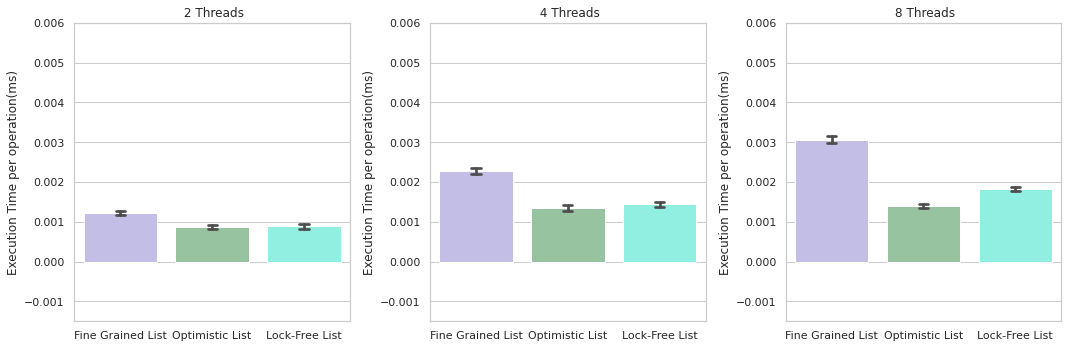

In [73]:
fig, ax = plt.subplots(1, 3, figsize= (15, 5))
plt.tight_layout(pad=0.4, w_pad=3.5, h_pad=1.0)

sns.barplot(experimento2Threads2, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[0], capsize= 0.1, errcolor=".3")
sns.barplot(experimento2Threads4, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[1], capsize= 0.1, errcolor=".3")
sns.barplot(experimento2Threads8, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[2], capsize= 0.1, errcolor=".3")

for i in range(0, 3): 
    ax[i].set_ylabel("Execution Time per operation(ms)")
    ax[i].set_ylim(-0.0015, 0.006)

ax[0].set_title(" " + str(2) + " Threads")
ax[1].set_title(" " + str(4) + " Threads")
ax[2].set_title(" " + str(8) + " Threads")
plt.savefig('graficos/Experimento2.pdf', bbox_inches="tight")

#### Experimento 3: Agregar concurrentemente  

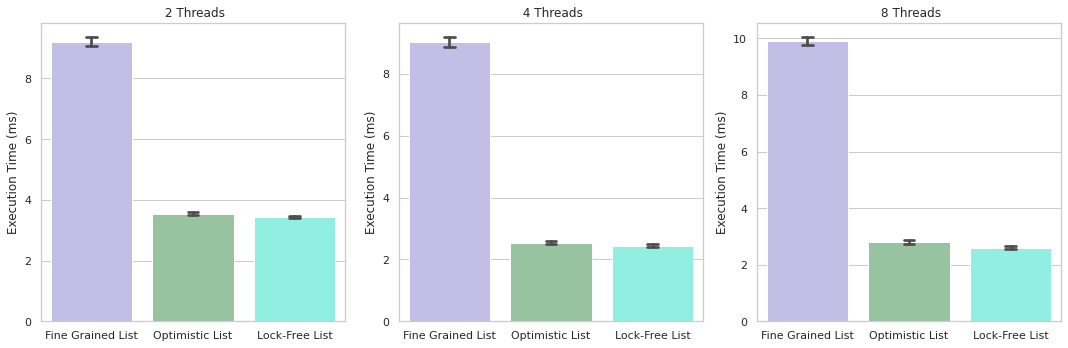

In [74]:
fig, ax = plt.subplots(1, 3, figsize= (15, 5))
plt.tight_layout(w_pad=0.7)

sns.barplot(experimento3Threads2, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[0], capsize= 0.1, errcolor=".3")
sns.barplot(experimento3Threads4, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[1], capsize= 0.1, errcolor=".3")
sns.barplot(experimento3Threads8, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[2], capsize= 0.1, errcolor=".3")

for i in range(0, 3): 
    ax[i].set_ylabel("Execution Time (ms)")

ax[0].set_title(" " + str(2) + " Threads")
ax[1].set_title(" " + str(4) + " Threads")
ax[2].set_title(" " + str(8) + " Threads")
plt.savefig('graficos/Experimento3.pdf', bbox_inches="tight")

#### Experimento 4: Agregar concurrentemente por bloques vs salteado

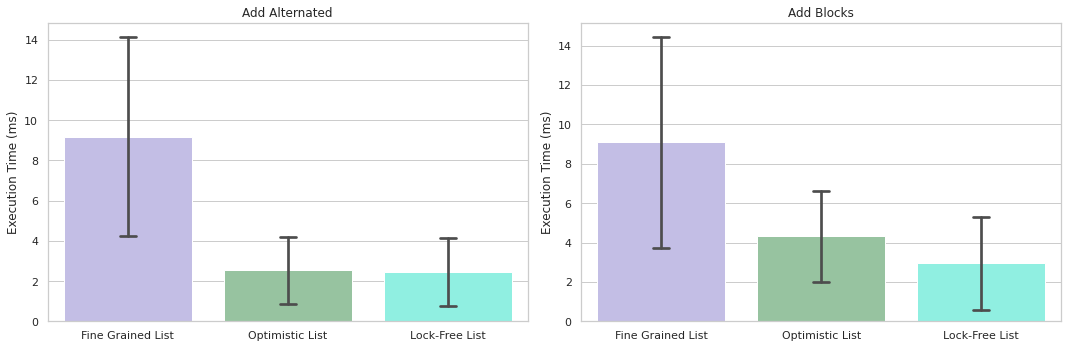

In [75]:
fig, ax = plt.subplots(1, 2, figsize= (15, 5))
plt.tight_layout()

sns.barplot(experimento4ThreadsAlternated, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[0], capsize= 0.1, errcolor=".3")
sns.barplot(experimento4ThreadsBlock, estimator= 'mean', errorbar = 'se', n_boot=1000, ax = ax[1], capsize= 0.1, errcolor=".3")

for i in range(0, 2): 
    ax[i].set_ylabel("Execution Time (ms)")

ax[1].set_title("Add Blocks")
ax[0].set_title("Add Alternated")

plt.savefig('graficos/Experimento4.pdf', bbox_inches="tight")

#### Experimento 5: Agregar y eliminar variando cantidad de threads dedicados a cada operación

In [67]:
#Cambiamos los colores porque observamos size y no excecution times
colorpalette = ["#FF477E", "#FFA200", "#FFE14C"]
sns.set_theme(style="whitegrid")
sns.set_palette(colorpalette)

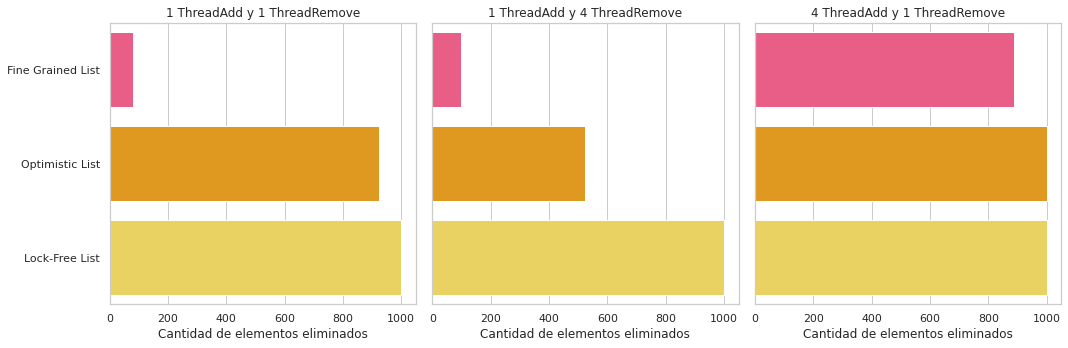

In [68]:
fig, ax = plt.subplots(1, 3, figsize= (15, 5), sharey=True)
plt.tight_layout(w_pad = 0)

sns.barplot(experimento5ThreadsAdd1ThreadsRemove1, estimator='median',  ax = ax[0], orient='h', errorbar=None)
sns.barplot(experimento5ThreadsAdd1ThreadsRemove4, estimator='median' ,ax = ax[1], orient='h', errorbar=None)
sns.barplot(experimento5ThreadsAdd4ThreadsRemove1, estimator='median',   ax = ax[2], orient='h', errorbar=None)

for i in range(0, 3): 
    ax[i].set_xlabel("Cantidad de elementos eliminados")

ax[0].set_title("1 ThreadAdd y 1 ThreadRemove")
ax[1].set_title("1 ThreadAdd y 4 ThreadRemove")
ax[2].set_title("4 ThreadAdd y 1 ThreadRemove")
plt.savefig('graficos/Experimento5.pdf', bbox_inches="tight")

### Experimento 6 Concurrencia con Sleep_Time

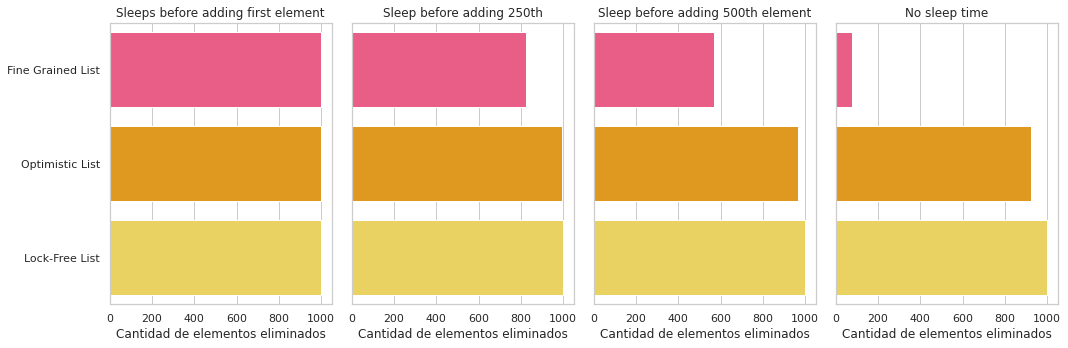

In [69]:
fig, ax = plt.subplots(1, 4, figsize= (15, 5), sharey=True)
plt.tight_layout(w_pad = 0)

sns.barplot(experimento6SleepBefore0, estimator='median',  ax = ax[0], orient='h', errorbar=None)
sns.barplot(experimento6SleepBefore250, estimator='median' ,ax = ax[1], orient='h', errorbar=None)
sns.barplot(experimento6SleepBefore500, estimator='median' ,ax = ax[2], orient='h', errorbar=None)
sns.barplot(experimento5ThreadsAdd1ThreadsRemove1, estimator='median',  ax = ax[3], orient='h', errorbar=None)


for i in range(0, 4): 
    ax[i].set_xlabel("Cantidad de elementos eliminados")

ax[0].set_title("Sleeps before adding first element")
ax[1].set_title("Sleep before adding 250th")
ax[2].set_title("Sleep before adding 500th element")
ax[3].set_title("No sleep time")

plt.savefig('graficos/Experimento6.pdf', bbox_inches="tight")